# Task 2 Email Spam

In [8]:
# import package

import nltk
import pandas as pd
import re
import nltk.data
from nltk.collocations import *
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.probability import *
from nltk.corpus import stopwords
from itertools import chain
import seaborn as sns

In [2]:
# load the file from excel and turn them into an dataframe
excel_df = pd.ExcelFile("Comment Spam.xls")
df = excel_df.parse(0)[["Comment", "Class"]]
df

,Comment,Class
0,this song is racist,0
1,and how many subscribers compared to her over ...,1
2,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
3,well done shakira,0
4,:D subscribe to me for daily vines,1
...,...,...
1295,Awsome<br />﻿,0
1296,https://www.tsu.co/KodysMan plz ^^﻿,1
1297,Sign up for free on TSU and start making money...,1
1298,MEGAN FOX AND EMINEM TOGETHER IN A VIDEO DOES...,0


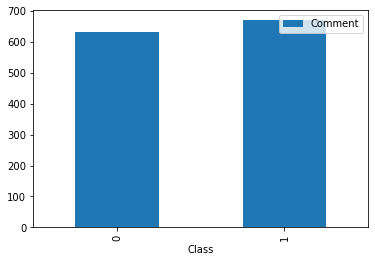

In [3]:
# count and plot the spam email and non spam email
df.groupby("Class").count().plot.bar()

We can see that there are a lot of email spam in the data. next we will be classify the sentences

## Classify the words

Doing the same process for cleaning the text data using several regular expression, stemming, delete stop word, and replace punctuation

In [9]:
stop = stopwords.words('english')
stemmer = PorterStemmer()
# use regular experssion and get the token using the regular expression 

tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?")
df["Comment"] = df["Comment"].apply(tokenizer.tokenize)\
    .apply(lambda x: [item for item in x if item not in stop])\
    .apply(lambda x: [stemmer.stem(y.lower()) for y in x]).apply(' '.join)\
    .str.replace('[^\w\s]','')

We will be using 2 different kind of model which are logistic model and naive bayes classifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import random

# split the data into train and test
random.seed(10)
msg_train, msg_test, spam_nospam_train, spam_nospam_test = train_test_split(df['Comment'], 
                                                        df['Class'], test_size=0.3, random_state=20)
count_vect = CountVectorizer()
# Convert a collection of text documents to a matrix of token counts
X_train_counts = count_vect.fit_transform(msg_train)
tfidf_transformer = TfidfTransformer()
# Transform a count matrix to a normalized tf or tf-idf representation
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# fit with logistic model
logit = LogisticRegression()
spam_model = logit.fit(X_train_tfidf, spam_nospam_train)

Accuracy of predicting test data : 0.9179487179487179
Accuracy of predicting train data : 0.9758241758241758


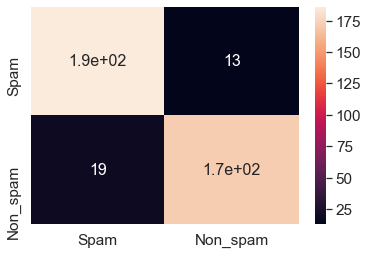

In [11]:
# predict using logistic
pred_test = spam_model.predict(tfidf_transformer.fit_transform(count_vect.transform(msg_test)))
pred_train = spam_model.predict(tfidf_transformer.fit_transform(count_vect.transform(msg_train)))
print("Accuracy of predicting test data :",accuracy_score(spam_nospam_test, pred_test))
print("Accuracy of predicting train data :",accuracy_score(spam_nospam_train, pred_train))
# create the confusion matrix
array = metrics.confusion_matrix(spam_nospam_test, pred_test)
df_cm = pd.DataFrame(array, ["Spam","Non_spam"], ["Spam","Non_spam"])
sns.set(font_scale=1.4)#for label size 
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

Using the logistic regression we can see that there are 30 texts that miss

Accuracy of predicting train data : 0.9692307692307692
Accuracy of predicting test data : 0.882051282051282


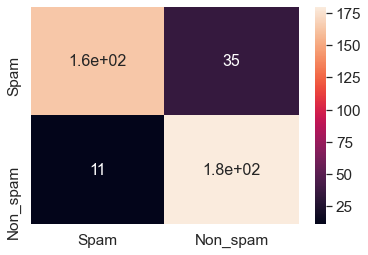

In [13]:
# fit with naive bayes classifier model
spam_model_naive = MultinomialNB().fit(X_train_tfidf, spam_nospam_train)
pred_train = spam_model_naive.predict(tfidf_transformer.fit_transform(count_vect.transform(msg_train)))
print("Accuracy of predicting train data :", accuracy_score(spam_nospam_train, pred_train))
pred_test = spam_model_naive.predict(tfidf_transformer.fit_transform(count_vect.transform(msg_test)))
print("Accuracy of predicting test data :", accuracy_score(spam_nospam_test, pred_test))
# create the confusion matrix
array = metrics.confusion_matrix(spam_nospam_test, pred_test)
df_cm = pd.DataFrame(array, ["Spam","Non_spam"], ["Spam","Non_spam"])
sns.set(font_scale=1.4)#for label size 
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

Using the naive bayes we can see that there are 43 texts that miss

In [14]:
# predict using logistic regression
def predicted_spam_log(word):
    dict_string = eval(word)
    word = dict_string["text"]
    sentence = [word]
    df_word = pd.DataFrame(sentence)[0].apply(tokenizer.tokenize)\
    .apply(lambda x: [item for item in x if item not in stop])\
    .apply(lambda x: [stemmer.stem(y.lower()) for y in x]).apply(' '.join)\
    .str.replace('[^\w\s]','')
    predict_log = spam_model.predict(tfidf_transformer.fit_transform(count_vect.transform(df_word)))
    if predict_log[0] == 1:
        result = "Spam"
    else:
        result = "Non Spam"
    return result

In [15]:
# predict using naive bayes
def predicted_spam_naive(word):
    dict_string = eval(word)
    word = dict_string["text"]
    sentence = [word]
    df_word = pd.DataFrame(sentence)[0].apply(tokenizer.tokenize)\
    .apply(lambda x: [item for item in x if item not in stop])\
    .apply(lambda x: [stemmer.stem(y.lower()) for y in x]).apply(' '.join)\
    .str.replace('[^\w\s]','')
    predict_naive = spam_model_naive.predict(tfidf_transformer.fit_transform(count_vect.transform(df_word)))
    if predict_naive[0] == 1:
        result = "Spam"
    else:
        result = "Non Spam"
    return result

In [16]:
predicted_spam_naive(input("write a sentence: "))

write a sentence: 


SyntaxError: unexpected EOF while parsing (<string>, line 0)

In [358]:
predicted_spam_log(input("write a sentence: "))

write a sentence: {"text" :"Find out how i make $20 Million/year online with these easy steps !", "type":"comment"}


'Non Spam'

## Create and app using Dash

In [359]:
# !pip install dash
# importing required libraries 
import dash 
import dash_core_components as dcc     
import dash_html_components as html
from dash.dependencies import Input, Output

In [360]:
# create an dash application 
app = dash.Dash() 
  
app.layout = html.Div(children =[ 
    dcc.Input(id ='input',  
              value ='Enter a dictionary that can be classify',  
              type ='text', style = dict(
            width = '68%',
            display = 'table-cell')), 
      
    html.Div(id ='output') 
]) 
# create input and output
@app.callback( 
    Output(component_id ='output', component_property ='children'), 
    [Input(component_id ='input', component_property ='value')] 
) 
# using this function to predict the dictionary
def predicted_spam_log_test(input_data): 
    try:
        dict_string = eval(input_data)
        word = dict_string["text"]
        sentence = [input_data]
        df_word = pd.DataFrame(sentence)[0].apply(tokenizer.tokenize)\
            .apply(lambda x: [item for item in x if item not in stop])\
            .apply(lambda x: [stemmer.stem(y.lower()) for y in x]).apply(' '.join)\
            .str.replace('[^\w\s]','')
        predict_log = spam_model.predict(tfidf_transformer.fit_transform(count_vect.transform(df_word)))
        if predict_log[0] == 1:
            result = "Spam"
        else:
            result = "Non Spam"
        return "{prediction : ", result + "}"
    except: 
        return "Error, the input check the double quotes and other string"

In [361]:
# open the dash link to input the dictionary
if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Sep/2020 21:59:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2020 21:59:31] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2020 21:59:31] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2020 21:59:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2020 21:59:42] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2020 21:59:52] "POST /_dash-update-component HTTP/1.1" 200 -


In [3]:
!pip install anvil-uplink

In [5]:
import anvil.server

anvil.server.connect("23EYVSQEUSSH7ORKBZSCXSQK-Y5A54XMRFCWWIL3T")

AttributeError: module 'anvil' has no attribute 'LiveObject'